## Classification Modelling

<h3> Introduction </h3>
Some say that a good life starts 'in utero'. That is why prenatal and antenatal care is very important. However, low birth weight is still prevalent. Low birth weight causes babies to: a. not survive their first month; b. higher risk of stunted growth; c. lower IQ; and d. adult-onset chronic conditions. In 2020, a  research conducted by UNICEF shows that 14.7 percent of babies around the world was born with low birth weight. This amounts to 19.8 million of all babies. All said, this analysis is concentrated on the factors that may affect low birth weight during pregnancy and before the event horizon or pre-birth. 

<h3> Conclusion and Recommendations </h3>
Having the analysis  focused on pregnancy care, we looked into how factors like early prenatal care, substance use, period when prenatal care starts, and age difference between the parents. These proved that both internal and external factors do affect pregnancy. These may lead to hypertension, kidney disease, diabetes, and ultimately to gestational hypertension which is a great risk for pregnancy. By using Random Forest, GBM, and Decision Tree models demonstrated a meticulous understanding of the dynamics in the variables which may be difficult to achieve using simpler models. Particularly, by using GBM model, we saw valuable insights as to the variables that has the most impact when it comes to birth weight.

<h3> Importation of all Necessary Packages </h3>

In [1]:
########################################
# importing packages
########################################

# essentials
import phik # importing phik for the phi coeff
import seaborn           as sns # importing SNS import for improving visuals
import matplotlib.pyplot as plt # importing Matplotlib for data visualization
import pandas            as pd  # importing Pandas package 
import numpy             as np  # importing for essential maths


# Preparing the model
from sklearn.model_selection import train_test_split   # For train-test split
from imblearn.over_sampling import SMOTE               # Controling any imbalanced classification
from sklearn.preprocessing import PowerTransformer     # For controlling skewness
from sklearn.preprocessing import StandardScaler       # Scaler Package
from sklearn.model_selection import RandomizedSearchCV # For Hyper Parameter tuning


# For the results of the model
from sklearn.metrics import confusion_matrix           # confusion matrix
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.metrics import recall_score               # recall score
from sklearn.metrics import precision_score            # precision score
from sklearn.metrics import accuracy_score             # accuracy score
from sklearn.metrics import precision_recall_curve     # precision recall curve

#Importing machine learning Packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.feature_selection import RFECV             # automating feature selection


########################################
# WILL HAVE TO REMOVE THIS 
#loading data and setting display options
########################################
# loading data
#df_birth = pd.read_excel(io = './birthweight.xlsx',
                        # header = 0,
                         # index_col  = 'obs_id')

# setting pandas print options
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_colwidth', 100)


<h3> Exploratory Data Analysis (EDA) and Data Preprocessing (DP) </h3>
<h4> Data Exploration </h4>

In [2]:
# MAY NEED TO REMOVE THIS

# instantiating data
modeling_data = "C:/Users/Francis Penalosa/OneDrive - Hult Students/IntroMachi/birthweight.xlsx"



# calling this
birthwght_df = pd.read_excel(io         = modeling_data,
                       # sheet_name = 'data',
                        header     = 0,
                        index_col  = 'bwt_id')


# checking data
birthwght_df.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
bwt_id,,,,,,,,,,,,,,,,,,
bwt_1,28,12.0,2,10.0,31.0,17.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3317
bwt_2,21,NaN,1,6.0,21.0,NaN,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,1160
bwt_3,27,15.0,2,11.0,32.0,16.0,9.0,9.0,0.0,0.0,1,1,0,0,1,0,0,4706
bwt_4,33,17.0,1,20.0,39.0,17.0,9.0,10.0,0.0,0.0,0,0,0,1,0,0,1,3289
bwt_5,30,15.0,2,12.0,36.0,16.0,9.0,9.0,NaN,NaN,1,1,0,0,1,0,0,3490


In [3]:
#Checking Data Info

birthwght_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, bwt_1 to bwt_473
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    409 non-null    int64  
 1   meduc   404 non-null    float64
 2   monpre  409 non-null    int64  
 3   npvis   391 non-null    float64
 4   fage    408 non-null    float64
 5   feduc   401 non-null    float64
 6   omaps   407 non-null    float64
 7   fmaps   407 non-null    float64
 8   cigs    381 non-null    float64
 9   drink   382 non-null    float64
 10  male    409 non-null    int64  
 11  mwhte   409 non-null    int64  
 12  mblck   409 non-null    int64  
 13  moth    409 non-null    int64  
 14  fwhte   409 non-null    int64  
 15  fblck   409 non-null    int64  
 16  foth    409 non-null    int64  
 17  bwght   409 non-null    int64  
dtypes: float64(8), int64(10)
memory usage: 60.7+ KB


In [4]:
# Looking into the data description

birthwght_df.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,409.000000,404.000000,409.000000,391.000000,408.000000,401.000000,407.000000,407.000000,381.000000,382.00000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,29.850856,13.655941,2.220049,11.565217,32.240196,13.902743,8.196560,8.953317,1.194226,0.02356,0.488998,0.872861,0.073350,0.053790,0.875306,0.073350,0.051345,3189.870416
std,5.126321,2.157091,1.334126,3.890187,6.135341,2.237860,1.412711,0.583249,4.265414,0.31907,0.500491,0.333537,0.261029,0.225879,0.330777,0.261029,0.220970,748.450059
min,16.000000,3.000000,0.000000,0.000000,18.000000,6.000000,1.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
25%,27.000000,12.000000,1.000000,10.000000,28.000000,12.000000,8.000000,9.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2780.000000
50%,30.000000,13.000000,2.000000,12.000000,32.000000,14.000000,9.000000,9.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3340.000000
75%,33.000000,16.000000,3.000000,13.000000,36.000000,16.000000,9.000000,9.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3686.000000
max,44.000000,17.000000,8.000000,36.000000,62.000000,17.000000,10.000000,10.000000,30.000000,6.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5089.000000


In [5]:
# Missing value checks

missing_values_info = birthwght_df.isnull().sum()

missing_values_info

mage       0
meduc      5
monpre     0
npvis     18
fage       1
feduc      8
omaps      2
fmaps      2
cigs      28
drink     27
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
dtype: int64

MY NOTE: I NEED TO CHANGE THIS Based on the details of the dictionary, dropping all apgar score since these are after a baby is born.

In [6]:
# Dropping columns after event horizon
birthwght_df.drop(['fmaps', 'omaps'], axis=1, inplace=True)

<h4> Setting Up Correlations </h4>

In [7]:
# creating feature sets
brth_continuous     = ['bwght','mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink']

brth_non_continuous = ['bwght','male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck','foth']


# pearson correlation
birthwght_corr = birthwght_df[ brth_continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
birthwght_phi_corr = birthwght_df[ brth_non_continuous ].phik_matrix(
    interval_cols = brth_non_continuous).round(decimals = 4)


# checking results
print(f"""
Pearson Correlations
---------------------------
{birthwght_corr.loc[ : , 'bwght'].sort_values(ascending = False)}


Phi Coefficients
----------------
{birthwght_phi_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}
""")


Pearson Correlations
---------------------------
bwght     1.0000
npvis     0.1806
fage      0.1388
feduc     0.0605
monpre    0.0551
mage      0.0546
meduc     0.0013
drink    -0.0290
cigs     -0.0415
Name: bwght, dtype: float64


Phi Coefficients
----------------
bwght    1.0000
foth     0.1277
moth     0.1086
mwhte    0.1006
fwhte    0.0727
male     0.0376
mblck    0.0000
fblck    0.0000
Name: bwght, dtype: float64



<h4> Q1. Analyzing Correlation </h4><br>

From the correlations above, we can see a negative correlation of the variables with birth weight. This tells us that more analysis is needed. It will be best to just focus on the highest correlation and the direction it may affect birth weight. 
With this, below are our more detailed observations:

<b>Correlations for continuous variables):</b><br>

A. Continuous Variables:
Positive correlations are detected with npvis, fage, meduc, monpre, and mage. This shows that prenatal vistis, mother's education, and the age of the parents have positive influence with birth weight. On the other hand, , drink and cigs, indicate negative correlations indicating that these two variables contributes to low birth weight.

B. Phi Coefficients:
Overall, this result tells us that race is greatly impacting birth weight.

<h4> Missing Value Check </h4>

In [8]:
# Checking for null values
# Get the information on missing values per column
missing_values_info = birthwght_df.isnull().sum()

missing_values_info

mage       0
meduc      5
monpre     0
npvis     18
fage       1
feduc      8
cigs      28
drink     27
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
dtype: int64

Missing values are present in meduc (mother's education in years), monpre (month of pregnancy that prenatal care began), npvis (total number of prenatal visits), fage (father's age in years), feduc (father's education in years), cigs (average cigarettes per day consumed by the mother) and drink (average drinks per week consumed by the mother).

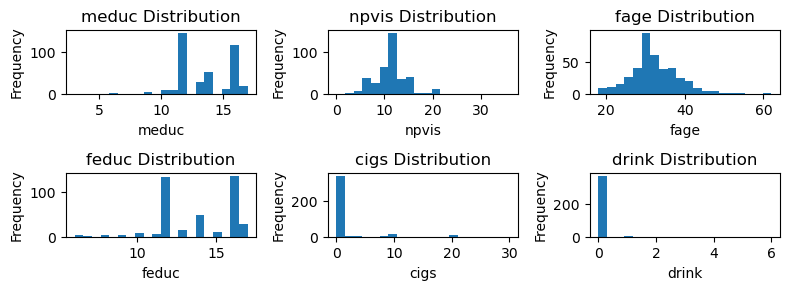

,meduc,npvis,fage,feduc,cigs,drink
count,404.000000,391.000000,408.000000,401.000000,381.000000,382.00000
mean,13.655941,11.565217,32.240196,13.902743,1.194226,0.02356
std,2.157091,3.890187,6.135341,2.237860,4.265414,0.31907
min,3.000000,0.000000,18.000000,6.000000,0.000000,0.00000
25%,12.000000,10.000000,28.000000,12.000000,0.000000,0.00000
50%,13.000000,12.000000,32.000000,14.000000,0.000000,0.00000
75%,16.000000,13.000000,36.000000,16.000000,0.000000,0.00000
max,17.000000,36.000000,62.000000,17.000000,30.000000,6.00000


In [9]:
# THERE ARE ONLY 6 COLUMNS THAT HAS 6 COLUMNS

# Checking for distributions
# Columns with missing values
brth_cols = ['meduc', 'npvis','fage','feduc','cigs','drink']

# Create a figure and a grid of subplots
plt.figure(figsize=(8, 4))  # Adjust the size as needed

# Loop through the numerical columns and create a subplot for each one
for index, column in enumerate(brth_cols, start=1):  # Start enumeration at 1 for subplot indexing
    plt.subplot(3, 3, index)  # Create a subplot in the right position
    birthwght_df[column].hist(bins=20)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

# Understanding the Data Statistics further
birthwght_df[brth_cols].describe()

<b> Distribution:</b><br>
Observing the histograms, we can see that the variables 'meduc', fage, feduc, 'cigs', and 'drink' shows some skewness. In order to control this, we will use median for imputing missing values for the three features mentioned above. However, for both cigs and drink it will be in our best interest to do further analysis.

In [10]:
# Creating correlation matrix to understand relationship of age, education, cigarets and drinks
correlation_matrix = birthwght_df[['mage', 'meduc', 'cigs', 'drink']].corr()
print(correlation_matrix)

           mage     meduc      cigs     drink
mage   1.000000  0.312449 -0.088023  0.038009
meduc  0.312449  1.000000 -0.183644  0.007885
cigs  -0.088023 -0.183644  1.000000  0.249570
drink  0.038009  0.007885  0.249570  1.000000


<b>Cigs and drink:</b><br>
Further observation done with cigs and drink, tells us that there is a negative correlation between education and cigarettes. While a positive correlation can be seen between education and drink.For quick control we will just provide 0 for the null values for cigs and drinks.

<h4> Data Imputation </h4>

In [11]:
## Imputations based on the analysis above ##
# Imputing data using median

for birthcol1 in ['monpre', 'npvis','feduc', 'cigs']:
    birthwght_df[birthcol1].fillna(birthwght_df[birthcol1].median(), inplace=True)
    
# Imputing data using mean
birthwght_df['fage'].fillna(birthwght_df['fage'].mean(), inplace=True)

# Imputing data using 0
for birthco2 in [ 'drink']:
    birthwght_df[birthco2].fillna(0, inplace=True)
    
# Imputing female education from age
# Reseting the index of the DataFrame 

#FROM GPT(WILL NEED TO CHANGE THIS CAPTION)
birthwght_df['Education'] = birthwght_df.index

# Now you can reset the index without dropping the old one, as it's already saved in a new column
birthwght_df.reset_index(drop=True, inplace=True)


#birthwght_df = birthwght_df.reset_index() THIS CODE IS NOT WORKING

# Defining a function that imputes the median based on age groups
def impute_education(group):
    median_education = group['meduc'].median()
    group['meduc'] = group['meduc'].fillna(median_education)
    return group

# Applying the function to each group of ages
birthwght_df = birthwght_df.groupby('mage').apply(impute_education) 
# Setting the index to back to bwt_id 
if 'bwt_id' in birthwght_df.columns:
    birthwght_df = birthwght_df.set_index('bwt_id')
    
# Verifying no missing values present
print(birthwght_df[['meduc', 'monpre', 'npvis','fage','feduc','cigs','drink']].isnull().sum())

#'meduc', 'npvis','fage','feduc','cigs','drink'

meduc     0
monpre    0
npvis     0
fage      0
feduc     0
cigs      0
drink     0
dtype: int64


In [12]:
birthwght_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 409 entries, (16, 58) to (44, 267)
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mage       409 non-null    int64  
 1   meduc      409 non-null    float64
 2   monpre     409 non-null    int64  
 3   npvis      409 non-null    float64
 4   fage       409 non-null    float64
 5   feduc      409 non-null    float64
 6   cigs       409 non-null    float64
 7   drink      409 non-null    float64
 8   male       409 non-null    int64  
 9   mwhte      409 non-null    int64  
 10  mblck      409 non-null    int64  
 11  moth       409 non-null    int64  
 12  fwhte      409 non-null    int64  
 13  fblck      409 non-null    int64  
 14  foth       409 non-null    int64  
 15  bwght      409 non-null    int64  
 16  Education  409 non-null    object 
dtypes: float64(6), int64(10), object(1)
memory usage: 76.2+ KB


<h4> Q2 Low Birth Weight Analysis </h4>

UNICEF describe low birth weight which are babies who weigh less than 2500 grams. Standford Medicine further provide that the average newborn usually weigh 8 pounds or about 3600 grams. This average may be different for different regions of the world. However, the definition of less than 2500 grams for low birth weight seems to be universal. From here, we can conclude that 2500 is the threshold to identify low birth weight.

In [13]:
# Setting up  Response Variable 

birthwght_df['low_bwght'] = birthwght_df['bwght'].apply(lambda x: 1 if (x <= 2500) else 0).astype(int)

# Now, we will drop birth weight because our response variable wiill be low birth weight
birthwght_df.drop(['bwght'], axis=1, inplace=True)

In [14]:
# Looking into low birth weight data points

value_counts = birthwght_df.value_counts(
    subset    = 'low_bwght',
    normalize = True      ).round(decimals = 2).sort_index(ascending = True)


# Setting up our feature sets

bwght_continuous     = ['low_bwght','mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink']

bwght_non_continuous = ['low_bwght','male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck','foth']


# Setting up Pearson Correlation

birthwght_df_corr = birthwght_df[ bwght_continuous ].corr(method = 'pearson').round(decimals = 4)


# Setting up Phi Coefficient
birthwght_df_phi_corr = birthwght_df[ bwght_non_continuous ].phik_matrix(interval_cols = 
                                                                         bwght_non_continuous).round(decimals = 4)


# For checking results
print(f"""
Low Birth Weight Data
---------------------------
{value_counts}

Pearson Correlations
---------------------------
{birthwght_df_corr.loc[ : , 'low_bwght'].sort_values(ascending = False)}


Phi Coefficients
----------------
{birthwght_df_phi_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}
""")


Low Birth Weight Data
---------------------------
low_bwght
0    0.8
1    0.2
Name: proportion, dtype: float64

Pearson Correlations
---------------------------
low_bwght    1.0000
cigs         0.0508
meduc        0.0250
drink       -0.0152
feduc       -0.0233
mage        -0.0446
monpre      -0.0629
fage        -0.0916
npvis       -0.1359
Name: low_bwght, dtype: float64


Phi Coefficients
----------------
low_bwght    1.0
male         0.0
mwhte        0.0
mblck        0.0
moth         0.0
fwhte        0.0
fblck        0.0
foth         0.0
Name: low_bwght, dtype: float64



<h4> Q3 Transformation of Birth Weight (bwght) to  Low Birth Weight </h4><br>

The data above shows that cigs and meduc has positive correlation with low birth rate while the other variables have negative correaltions. This tells us that npvis, cigs, meduc, fage and mage, and monpre greatly impact low birth weight.
From here, we could start creating new features and further building our model to continue analysis. We can assume here that prenatal care data of npvis and monpre may have great impact to low birth weight. The same can be said with substance use (cigs and drinks) and parents' ages (fage and mage).

<h3> Standardization and Transformation </h3>

In [15]:
# yeo-johnson transformation
birthwght_df_original = birthwght_df.copy()

# List of numerical features to transform
x_skewed = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 
            'feduc', 'cigs', 'drink']

# Initialize the PowerTransformer with the Yeo-Johnson method
transformer = PowerTransformer(method='yeo-johnson')

# Fit the transformer to the numerical features and transform them
birthwght_df[x_skewed] = transformer.fit_transform(birthwght_df[x_skewed])

# Check the transformed features
birthwght_df[x_skewed].describe()

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink
count,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02,4.090000e+02
mean,1.389815e-16,2.258449e-16,4.516898e-16,1.302951e-16,3.474537e-16,-1.216088e-16,-4.777488e-17,-2.605902e-17
std,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00,1.001225e+00
min,-2.688519e+00,-3.492411e+00,-4.629901e+00,-4.778415e+00,-2.889063e+00,-2.606006e+00,-3.106677e-01,-9.938080e-02
25%,-5.586435e-01,-8.188451e-01,-1.289735e+00,-3.644367e-01,-6.616456e-01,-9.227677e-01,-3.106677e-01,-9.938080e-02
50%,2.679366e-02,-3.726761e-01,9.343653e-02,1.852498e-01,4.095286e-02,-5.540199e-02,-3.106677e-01,-9.938080e-02
75%,6.138166e-01,1.135958e+00,8.841138e-01,1.852498e-01,6.718745e-01,9.779386e-01,-3.106677e-01,-9.938080e-02
max,2.777813e+00,1.694737e+00,2.484506e+00,4.893830e+00,3.718856e+00,1.558939e+00,3.221088e+00,1.006231e+01


In [16]:
# List of non-binary columns to standardize
non_binary_columns = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 
                      'cigs', 'drink']

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the non-binary data
scaler.fit(birthwght_df[non_binary_columns])

# TRANSFORMING the non-binary data
birthwght_df[non_binary_columns] = scaler.transform(birthwght_df[non_binary_columns])

# Checking the first 5 rows of the dataframe
birthwght_df.head(n=5)

mage     meduc    monpre     npvis      fage     feduc  \
mage                                                                   
16   58  -2.688519 -1.236207  1.407359  0.185250 -2.129102 -0.922768   
17   28  -2.496195 -0.818845  0.093437 -0.658139 -2.371646  0.440094   
     390 -2.496195 -1.983245  2.484506 -2.015045 -2.371646 -1.631419   
18   55  -2.303573 -0.818845  0.884114  0.185250 -2.371646 -0.922768   
     112 -2.303573 -0.818845  0.093437 -0.966976 -2.371646 -0.922768   

              cigs     drink  male  mwhte  mblck  moth  fwhte  fblck  foth  \
mage                                                                         
16   58  -0.310668 -0.099381     1      1      0     0      1      0     0   
17   28  -0.310668 -0.099381     0      1      0     0      1      0     0   
     390  3.220850 -0.099381     0      0      1     0      0      1     0   
18   55  -0.310668 -0.099381     1      1      0     0      1      0     0   
     112  3.221034 -0.099381     1      1      0     0      1      0     0   

         Education  low_bwght  
mage                           
16   58     bwt_65          0  
17   28     bwt_33          1  
     390   bwt_453          0  
18   55     bwt_62          0  
     112   bwt_130          0

<h3> Feature Engineering </h3>

In [17]:
# Factors that could affect pregnance leading to low birth weight

# Early Prenatal Care 
birthwght_df['early_prenatal_care'] = (birthwght_df['monpre'] <= 3).astype(int)

# Age difference 
birthwght_df['prnts_age_diff'] = birthwght_df['mage'] - birthwght_df['fage']

# Prenatal Care Index
birthwght_df['prenat_care_indx'] = birthwght_df['monpre'] * birthwght_df['npvis']

# Substance Use
birthwght_df['subst_use_scre'] = (birthwght_df['cigs'] * 0.5) + (birthwght_df['drink'] * 0.5)

# Health Risk Factor
birthwght_df['hlth_rsk'] = ((birthwght_df['cigs'] > 0).astype(int) + 
                               (birthwght_df['drink'] > 0).astype(int) + 
                               (birthwght_df['monpre'] > 3).astype(int))


#birthwght_df['young_mom'] = birthwght_df_original['mage'].apply(lambda x: 1 if (x <= 21) else 0).astype(int)

## Feature 2: Readiness of Dad ##
#birthwght_df['ready_dad'] = birthwght_df['feduc'] * birthwght_df['fage'] 

## Feature 3: Education / Ability to Access Health Care ##
#birthwght_df['tot_educ'] = birthwght_df['feduc'] * birthwght_df['meduc'] 

## Feature 4: Age Gap ##
#birthwght_df['age_gap'] = birthwght_df['fage'] - birthwght_df['mage'] 

<h4>Feature Explanations</h4><br>
The features we have engineered should cover the real world effects of prenatal care, substance use, and parents' ages. These features are:

1. early_prenatal_care - this should provide a measure as to when prenatal care started starting with the first trimester;
2. prnts_age_diff - this computes the difference between the age of the parents;
3. prenat_care_indx - or prenatal care index. This is combining prenatal care and the number of visits to indicate the quality of care;
4. subst_use_scre - this is to assess potential of substance use;
5. hlth_rsk - health risk factor to create a measure between substance use and late prenatal care.

In [18]:
# Standardizing the features

bwght_cont_cols = ['early_prenatal_care', 'prnts_age_diff', 'prenat_care_indx', 'subst_use_scre', 'hlth_rsk']

# Instantiating a new StandardScaler object for the new continuous features
new_scaler = StandardScaler()

# Fitting the new scaler with the new continuous data
new_scaler.fit(birthwght_df[bwght_cont_cols])

# Transforming the new continuous features
birthwght_df[bwght_cont_cols] = new_scaler.transform(birthwght_df[bwght_cont_cols])


<h3> Candidate Model Development</h3>

<h4>Train-Test Split</h4>

In [19]:
# Prepare the training data for modeling
y_variable = birthwght_df['low_bwght']

# Define the features based on the dataset columns
core_features = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink', 
                 'male','early_prenatal_care', 'prnts_age_diff', 'prenat_care_indx', 
                 'subst_use_scre', 'hlth_rsk']

# You can add more feature groups if needed, similar to the previous example
# For now, we'll use only the core features
x_features = birthwght_df[core_features]


<h4>Candidate Modeling</h4>

<b>Tackling the Data:</b></br>
From everything we have done so far, we notice some imbalance with our data. This is why we will be implementing an oversampling technique like SMOTE to potentially balance the distribution of our data. 

<b>Models Used:</b></br>
We will use Random Forest, Decision Tree, and GBM (Gradient Boosting Machine) Classification for our models.

In [20]:
# Applying SMOTE
smote= SMOTE(random_state=167)
x_resampled, y_resampled = smote.fit_resample(x_features, y_variable)

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, 
                                                        test_size=0.3, random_state=167,
                                                        stratify= y_resampled) # preserving balance

# Model Development
models = {
    'Random Forest Classification': RandomForestClassifier(class_weight='balanced', 
                                                           n_estimators=100, 
                                                           max_depth=10),
    'Decision Tree Classification': DecisionTreeClassifier(class_weight='balanced', 
                                                           max_depth=10,
                                                           min_samples_leaf=2, 
                                                           min_samples_split=30),
    'GBM Classification': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                                                    loss          = 'log_loss',
                                                    criterion     = 'friedman_mse',
                                                    warm_start    = False)
}

# Training and evaluating the models
for name, model in models.items():
    
    # Model fitting
    model_fit = model.fit(x_train, y_train)
    
    # Training scores
    model_pred = model_fit.predict(x_test)
    
    # Saving score for future use
    train_score = round(model_fit.score(x_train, y_train),4)
    test_score  = round(model_fit.score(x_test, y_test),4)
    tt_gap      = round(train_score - test_score,4)
    
    # Confusion matrix unpacking
    modelreg_tn, modelreg_fp, modelreg_fn, modelreg_tp = confusion_matrix(y_true = y_test, 
                                                                          y_pred = model_pred).ravel()
    
    # AUC, Precision, and Recall
    auc       = round(roc_auc_score(y_true = y_test, y_score = model_pred),4)
    precision = round(precision_score(y_true = y_test, y_pred = model_pred),4)
    recall    = round(recall_score(y_true = y_test, y_pred = model_pred),4)
    
    # Printing metrics dynamically
    print(f"""\
    Model Summary for {name}
    ------------------------
    Train-Test Gap  : {tt_gap}
    AUC             : {auc}
    Precision       : {precision}
    Recall          : {recall}
    
    Confusion Matrix
    ----------------
    True Negatives  : {modelreg_tn}
    False Positives : {modelreg_fp}
    False Negatives : {modelreg_fn}
    True Positives  : {modelreg_tp}
    """)


    Model Summary for Random Forest Classification
    ------------------------
    Train-Test Gap  : 0.1479
    AUC             : 0.8434
    Precision       : 0.8469
    Recall          : 0.8384
    
    Confusion Matrix
    ----------------
    True Negatives  : 84
    False Positives : 15
    False Negatives : 16
    True Positives  : 83
    
    Model Summary for Decision Tree Classification
    ------------------------
    Train-Test Gap  : 0.1168
    AUC             : 0.7071
    Precision       : 0.747
    Recall          : 0.6263
    
    Confusion Matrix
    ----------------
    True Negatives  : 78
    False Positives : 21
    False Negatives : 37
    True Positives  : 62
    
    Model Summary for GBM Classification
    ------------------------
    Train-Test Gap  : 0.1528
    AUC             : 0.8081
    Precision       : 0.8352
    Recall          : 0.7677
    
    Confusion Matrix
    ----------------
    True Negatives  : 84
    False Positives : 15
    False Negatives : 

<b>Model Results:</b><br>

The metrics above show that, Model 3, has the highest AUC score. Though it is has a lower precision recall, having the  highest AUC should compensate for it. This provided, Model 3 seems to be the best choice for accurately dealing with our dataset.

<h4> Checking The Impact of Features </h4>

In [21]:
# Feature Analysis

gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=702)
gbm_model.fit(x_train, y_train)
gbm_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': gbm_model.feature_importances_})
gbm_importance = gbm_importance.sort_values(by='Importance', ascending=False)

gbm_importance

,Feature,Importance
3,npvis,0.165642
4,fage,0.165546
2,monpre,0.128167
5,feduc,0.116035
1,meduc,0.109278
10,prnts_age_diff,0.105266
11,prenat_care_indx,0.091674
0,mage,0.062625
8,male,0.037323
6,cigs,0.013514


<b> Q4 Impact of Features </b>

The above data shows that npvis has the highest importance score in our data. This means that it is the feature that has the largest impact on birth weight. However it is closely followed by fage which signifies the father's age. These two shows that they both greatly impact birth weight. From this, we could infer that the prenatal visit has a great effect to birth weight which we potentially can be tackled by our prenatal care index feature.

<h4> Hyperparameter Tuning </h4>

In [22]:
## Top Model: GBM ##
# Define the parameter grid for GBM
param_grid_gbm = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'warm_start': [True, False]  # Add warm_start to the grid
}

# Instantiate the RandomizedSearchCV object for GBM
grid_gbm = RandomizedSearchCV(GradientBoostingClassifier(random_state=167), 
                              param_distributions=param_grid_gbm, 
                              cv=5, scoring='precision', n_jobs=-1)

# Fit the model
grid_gbm.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters for GBM:", grid_gbm.best_params_)
print("Best precision for GBM:", grid_gbm.best_score_)

Best parameters for GBM: {'warm_start': True, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.2}
Best precision for GBM: 0.8415043402368261


In [23]:
# Getting the predicted probabilities
probabilities = grid_gbm.predict_proba(x_test)[:, 1]  

# Precision, recall, and thresholds calculations
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Looking for the threshold that maximizes precision
optimal_idx = np.argmax(precision[:-1]) 
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precision[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal Precision: {optimal_precision}")

# Optimal threshold to make binary predictions
predictions = (probabilities >= optimal_threshold).astype(int)

# Evaluating predictions
final_precision = precision_score(y_test, predictions)
print(f"Final Precision: {final_precision}")

Optimal Threshold: 0.9760296201910286
Optimal Precision: 1.0
Final Precision: 1.0


Model Summary for GBM
------------------------
Precision       : 0.9821
Recall          : 0.5556
AUC             : 0.9163



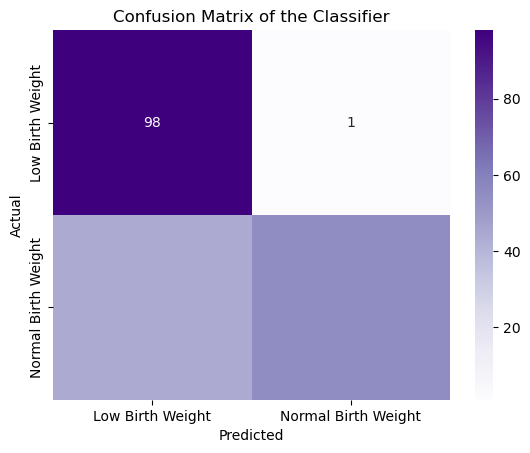

In [24]:
# Applying optimal threshold
optimal_threshold = optimal_threshold

# Fitting the model
model_fit = grid_gbm.fit(x_train, y_train)
    
# Predicting probabilities
probabilities = grid_gbm.predict_proba(x_test)[:, 1]
    
# Converting probabilities to binary predictions with the optimal threshold
model_pred = (probabilities >= optimal_threshold).astype(int)
    
# Evaluating the adjusted predictions
precision = round(precision_score(y_test, model_pred), 4)
recall = round(recall_score(y_test, model_pred), 4)
auc = round(roc_auc_score(y_test, probabilities), 4)
modelreg_tn, modelreg_fp, modelreg_fn, modelreg_tp = confusion_matrix(y_test, model_pred).ravel()

# Printing the model summary
print(f"""\
Model Summary for GBM
------------------------
Precision       : {precision}
Recall          : {recall}
AUC             : {auc}
""")

########################################
## Visual Confusion Matrix
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """

    # setting the labels
    lbls = labels
    

    # confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # setting a heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Purples',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()


# Calling the function
visual_cm(true_y = y_test,
          pred_y = model_pred,
          labels = ['Low Birth Weight', 'Normal Birth Weight'])


<b> Q5 Final Analysis - Question 5</b>

Our model has showed that there are 76 true negatives. This means that there are 76 instances which correctly predicted low birth weight by our model. However, it showed 84 true negatives which are instances that the model predicted normal birth weight.

Lastly, it shows 15 false positives which signifies a low number where the our model incorrectly predicted low birth weight while there are 23 false negatives which are instance that the model seem to have incorrectly predicted normal birth weight.

Our model indicated a high AUC of 0.8081 and precision score of 0.8352 demonstrating its effectiveness in identifying babies that are at risk of low birth weight.

<h3> Preparing for Kaggle Submission </h3>

<h4> Loading and Processing Data for Prediction </h4>

In [25]:
# Load and preprocess the test dataset
kaggle_test = "./kaggle_test_data.csv"
kaggle_data = pd.read_csv(  kaggle_test,
                            header     = 0,
                            index_col  = 'bwt_id')

## Impute missing values ##
# Imputing data using median
for col1 in ['monpre', 'npvis','feduc', 'cigs']:
    kaggle_data[col1].fillna(kaggle_data[col1].median(), inplace=True)
    
# Imputing data using mean
kaggle_data['fage'].fillna(kaggle_data['fage'].mean(), inplace=True)

# Imputing data using 0
for col2 in ['drink']:
    kaggle_data[col2].fillna(0, inplace=True)
    
# Imputing female education from age
# Reseting the index of the DataFrame
kaggle_data = kaggle_data.reset_index()

# Applying the function to each group of ages
kaggle_data = kaggle_data.groupby('mage').apply(impute_education)

# Setting the index to back to obs_id 
kaggle_data = kaggle_data.set_index('bwt_id')


## Transformations and Standardizations ##
# yeo-johnson transformation
kaggle_data_original = kaggle_data.copy()

# List of numerical features to transform
x_skewed = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 
            'feduc', 'cigs', 'drink']

# Transform the numerical features using the already fitted transformer
kaggle_data[x_skewed] = transformer.transform(kaggle_data[x_skewed])

# List of non-binary columns to standardize
non_binary_columns = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 
                      'cigs', 'drink']

# Standardize the non-binary data using the already fitted scaler
kaggle_data[non_binary_columns] = scaler.transform(kaggle_data[non_binary_columns])



# birthwght_df['early_prenatal_care'] = (birthwght_df['monpre'] <= 3).astype(int)

# # Age difference 
# birthwght_df['prnts_age_diff'] = birthwght_df['mage'] - birthwght_df['fage']

# # Prenatal Care Index
# birthwght_df['prenat_care_indx'] = birthwght_df['monpre'] * birthwght_df['npvis']

# # Substance Use
# birthwght_df['subst_use_scre'] = (birthwght_df['cigs'] * 0.5) + (birthwght_df['drink'] * 0.5)

# # Health Risk Factor
# birthwght_df['hlth_rsk'] = ((birthwght_df['cigs'] > 0).astype(int) + 
#                                (birthwght_df['drink'] > 0).astype(int) + 
#                                (birthwght_df['monpre'] > 3).astype(int))



## Feature Engineering ##
## Readiness of Parents ##
## Feature 1: Young Mom ##
kaggle_data['early_prenatal_care'] = (kaggle_data_original['monpre'] <= 3).astype(int)

## Feature 2: Readiness of Dad ##
kaggle_data['prnts_age_diff'] = kaggle_data['mage'] - kaggle_data['fage'] 

## Feature 3: Education / Ability to Access Health Care ##
kaggle_data['prenat_care_indx'] = kaggle_data['monpre'] * kaggle_data['npvis'] 

## Feature 4: Age Gap ##
kaggle_data['subst_use_scre'] = (kaggle_data['cigs'] * 0.5) + (kaggle_data['drink'] * 0.5)

## Feature 5: Health Risk
kaggle_data['hlth_rsk'] = ((kaggle_data['cigs'] > 0).astype(int) + 
                               (kaggle_data['drink'] > 0).astype(int) + 
                               (kaggle_data['monpre'] > 3).astype(int))


# ## Health awareness ##
# ## Feature 5: Smoking & Drinking vs Care ##
# kaggle_data['health_con'] =  kaggle_data['npvis'] - (kaggle_data['cigs'] * kaggle_data['drink'])

# birthwght_df['early_prenatal_care'] = (birthwght_df['monpre'] <= 3).astype(int)

# # Age difference 
# birthwght_df['prnts_age_diff'] = birthwght_df['mage'] - birthwght_df['fage']

# # Prenatal Care Index
# birthwght_df['prenat_care_indx'] = birthwght_df['monpre'] * birthwght_df['npvis']

# # Substance Use
# birthwght_df['subst_use_scre'] = (birthwght_df['cigs'] * 0.5) + (birthwght_df['drink'] * 0.5)

# # Health Risk Factor
# birthwght_df['hlth_rsk'] = ((birthwght_df['cigs'] > 0).astype(int) + 
#                                (birthwght_df['drink'] > 0).astype(int) + 
#                                (birthwght_df['monpre'] > 3).astype(int))

# ## Race ##
# ## Feature 6: Baby's Race ##

# # Same Race
# kaggle_data['baby_white'] = ((kaggle_data['mwhte'] == 1) & (kaggle_data['fwhte'] == 1)).astype(int)
# kaggle_data['baby_black'] = ((kaggle_data['mblck'] == 1) & (kaggle_data['fblck'] == 1)).astype(int)
# kaggle_data['baby_other'] = ((kaggle_data['moth'] == 1) & (kaggle_data['foth'] == 1)).astype(int)
# kaggle_data['baby_mixed'] = ((kaggle_data['mwhte'] == 1) & (kaggle_data['fblck'] == 1) | 
#                              (kaggle_data['mblck'] == 1) & (kaggle_data['fwhte'] == 1)|
#                           (kaggle_data['mwhte'] == 1) & (kaggle_data['foth'] == 1) | 
#                              (kaggle_data['moth'] == 1) & (kaggle_data['fwhte'] == 1)|
#                           (kaggle_data['mblck'] == 1) & (kaggle_data['foth'] == 1) | 
#                              (kaggle_data['moth'] == 1) & (kaggle_data['fblck'] == 1)|
#                           (kaggle_data['moth'] == 1) & (kaggle_data['foth'] == 1)).astype(int)

# re-applying standardizations
bwght_cont_col = ['early_prenatal_care', 'prnts_age_diff', 'prenat_care_indx', 'subst_use_scre', 'hlth_rsk']

# Instantiating a new StandardScaler object for the new continuous features
new_scaler = StandardScaler()

# Fitting the new scaler with the new continuous data
new_scaler.fit(kaggle_data[bwght_cont_col])

# Transforming the new continuous features
birthwght_df[bwght_cont_col] = new_scaler.transform(birthwght_df[bwght_cont_col])


# Prepare x_data_kaggle
x_data_kaggle_selected = kaggle_data[core_features]


<h4> Predicting for Kaggle Submission </h4>

In [26]:
# Train the Decision Tree model on the entire training dataset
grid_gbm.best_estimator_.fit(x_resampled, y_resampled)

# Make predictions using the best model to introduce more bias 
predictions = grid_gbm.predict_proba(x_data_kaggle_selected)
predictions = np.where(predictions[:,1] > 0.1, 1, 0)

## Kaggle Submission File ##

# organizing predictions
model_predictions = {"low_bwght" : predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = kaggle_data.index)

# name your model
model_pred_df.to_csv(path_or_buf = "./Testfinal_model.csv",
                     index       = True,
                     index_label = 'bwt_id')

<h3> Citations </h3>

1. UNICEF. 2023, July. Low birthweight https://data.unicef.org/topic/nutrition/low-birthweight/

2. Cedar Sinai. Gestational Hypertension. https://www.cedars-sinai.org/health-library/diseases-and-conditions/g/gestational-hypertension.html#:~:text=Having%20high%20blood%20pressure%20before,than%2040%20years%20of%20age

3. Children's Health. Stanford Medicine. https://www.stanfordchildrens.org/en/topic/default?id=low-birth-weight-90-P02382

4. OpenAI. (2023). ChatGPT: Optimizing language models for dialogue [Software]. https://openai.com/chatgpt